In [1]:
import numpy as np
import scipy.stats as st

# Binomial distribution

Suppose that  8%  of all persons suffer some form of color blindness. 
A sample of 200 persons is choosen randomly.

What is the probability that the sample suffring persons is larger than 15%?

Documentation :

https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-proportion/v/sampling-distribution-of-sample-proportion-part-1

In [57]:
p = 0.08
n = 200
se =np.sqrt(p*(1-p))
z = (0.15-p)/se
1- st.norm.cdf(z)

0.39819441499269925

As you may have noticed , the calculation are tedious using the bernouli formula , this can be tackled if we approxiate the result using **the standard normal distribution**,to do so, use sample proportion and Standard Normal distribution to get the same result.


notes : 
The mean and standar error of Bernouli formula is : 

\begin{equation}
\begin{aligned}
&\mu_{Y}=p \\
&\sigma_{Y}=\sqrt{P(1-p)}
\end{aligned}
\end{equation}

in order to perfom the following calculation , some conditions need to be met :

$n*p > 10$ <br>
$n*(p-1) >10$

such that $p$ is prob of success , and $n$ is the number of trials

In [8]:
print(n*p)
print(n*(1-p))

16.0
184.0


What is the probability that the sample defect rate is less than 4%?

In [45]:
# p(X<4)
st.norm.cdf(x=0.04 , loc=p , scale=np.sqrt(p*(1-p)))

0.441391595576413

In [21]:
1 - st.norm.cdf(x = 0.15 , loc=p , scale=np.sqrt(p*(1-p)))

0.39819441499269925

the calculations of 1) and 2) using the Binomial distribution. Then, compare. (hint : consider using binom function of scipy)

In [47]:
prob = 0
for i in range(0,4) : 
    prob+= st.binom.pmf(k=i, n = n , p = p)

print(prob)
print(st.binom.cdf(k=3,n=n,p=p))

5.907894002722092e-05
5.9078940027216704e-05


In [49]:
prob = 0
for i in range(0,16) : 
    prob+= st.binom.pmf(k=i, n = n , p = p)

print(1-prob)
print(1 - st.binom.cdf(k=15,n=n,p=p))

0.5374177640667627
0.5374177640666973


# Sample size for a given margin of error for a mean

Documentation :


https://colab.research.google.com/drive/1KUcVh06rx2-j_SN3j5wVEBTpBx-7K87J#scrollTo=J5EHPBWeDp-D

For populations that are large, Cochran (1963:75)
developed the Equation to yield a representative
sample for proportions :

\begin{equation}
n_{0}=\frac{Z^{2} p q}{ME^{2}}  
\end{equation}
<br>
such that , $q = (1-p)$ , the standard error is $\sqrt{\frac{p(1-p)}{n}}$ and $ME$ is the margin error <br> 
Suppose we want to evaluate a state wide Extension program in which farmers were
encouraged to adopt a new practice. Assume there is
a large population but that we do not know the
variability in the proportion that will adopt the
practice; therefore, assume p=.5 (maximum
variability). Furthermore, suppose we desire a 95%
confidence level and ±5% precision. The resulting
sample size is demonstrated in the following equation.

$$
n_{0}=\frac{Z^{2} p q}{ME^{2}}=\frac{(1.96)^{2}(.5)(.5)}{(05)^{2}}=385 \text { farmers }
$$

We can also use :

\begin{equation}
n_{0}=\frac{sigma^{2}}{e^{2}}
\end{equation}




Question 1---

Calculate the *minimum* sample size in each of the following cases.

a)- When we the standard error less than 20


b)- Use the Standard Normal distribution to calculate  the probability or the area under curve to the left of this 95%  confidence interval that should be less than 6.

c)- Use the Standard Normal distribution to calculate  the probability the full width of the 75% confidence interval confidence interval that should be less than 6.


In [214]:
# a
p = 0.5
#sigma = np.sqrt(p*(1-p))
sigma = 5
e = 20
n0 = (sigma**2)/(e**2)
n0

0.0625

In [221]:
#b
# n = ((z*sigma)/w)**2
w = 6
z = st.norm.ppf(0.95)
sigma = 5

n0 = ((z*sigma)/w)**2
n0
### the minimum sample size == 2

1.8788496208995926

In [222]:
#c
w = 6
z = st.norm.ppf(0.875)
sigma = 5

n0 = ((z*sigma)/w)**2
n0
### the minimum sample size == 1

0.918960900646851

Qustion 

According to the specification sheet, the average weight of the bolts is  μ=30 gr with  σ=2 gr.
Suppose that a sample of 50 bolts is drawn.

What is the probability that the sample mean is **between** 29.8gr and 30.2gr? (Use Standard Normal and Student-t)

<br>


recall that  the interval is $[\bar{x} - z_{1-\frac{\alpha}{2}} * \frac{\sigma}{\sqrt{n}}  ,\bar{x} + z_{1-\frac{\alpha}{2}} * \frac{\sigma}{\sqrt{n}}  ]$ 

<br>

In the confidence interval, there's what we call the margin error (also called half half), denoted $ME$ or $w$, and is equal to : <br>

$w = \bar{x} - z_{1-\frac{\alpha}{2}} * \frac{\sigma}{\sqrt{n}} $


use this formula to get $n$ the sample size. 


In [104]:
z1 = (30.2-30)/(2/np.sqrt(50))
z2 = (29.8-30)/(2/np.sqrt(50))

st.norm.cdf(z1)-st.norm.cdf(z2)

0.520499877813045

In [121]:
t1 = (30.2-30)/(2/np.sqrt(50))
t2 = (29.8-30)/(2/np.sqrt(50))

st.t.cdf(z1,df=49)-st.t.cdf(z2,df=49)

0.5171504292916964

In [216]:
w = 29.8
sigma = 2
x_bar = 30
n_sample_size = ((z1*sigma)/(x_bar-w))**2
n_sample_size = int(n_sample_size)
n_sample_size

50

Question

What is the probability that the sample mean is **larger** than 30.5gr? (Use Standard Normal and Student-t)

In [107]:
#Using the standard normal 
1 - st.norm.cdf(z1)

0.24315492495636803

In [117]:
#Using the student-t
1 - st.t.cdf(t1,df=49)

0.2414247853541518

# Correlation and interval estimation

In [125]:
import seaborn as sns
df = sns.load_dataset('iris')

x = df.petal_length
y = df.sepal_length

Question : 

calculate the pearson correlation between x and y , then calculate the 95% and 99% confidence interval.  



In [137]:
a = np.round(st.pearsonr(x,y) , 3)
a[0]

0.872

In [138]:
#Apply the Fisher's z transformation 
n = len(x)
r = a[0]
z = np.arctanh(r)
std_error_z = 1/np.sqrt(n-3)

In [139]:
# 95% 
low = np.tanh(z-st.norm.ppf(0.975)*std_error_z)
high = np.tanh(z+st.norm.ppf(0.975)*std_error_z)
print((low,high))

(0.8273604895524721, 0.9056927322146551)


In [140]:
# 99% 
low = np.tanh(z-st.norm.ppf(0.995)*std_error_z)
high = np.tanh(z+st.norm.ppf(0.995)*std_error_z)
print((low,high))

(0.810647725395961, 0.9144130908438719)


# F test for variance

Question :

Knowing that: f-test is equal to  $ \mathrm{s}_{1}^{2} / \mathrm{s}_{2}^{2}$.

Let's assume that we have the following values of two samples
- $n1=17$, $\bar{x}_1=5.0220 kg$, $s_1^2=0.0202 $
- $n2=26$, $\bar{x}_2=7.5263 kg$, $s_2^2=0.0178 $  

Test whether there is a significant difference in the variances (95%).

Do the right/ left / 2 side tail test.

recall that : <br>
the null hypothesis $H_{0}$ is that the two samples have equal population variances $s_{1}=s_{2}$

the alternative hypothesis $H_{a}$ is that the two samples have unequal population variances.  $s_{1}!=s_{2}$


this applies for two tails test


In [162]:
n1=17
n2=26
x1=5.022
x2=7.5263
s1_2=0.0202
s2_2=0.0178

alpha = 1-0.95

#H0 : no difference in variances
#Ha : difference in variances

#Calculate the F critical value 
f_stat = s1_2/s2_2

#Calculate degrees of freedom
df1 = 16
df2 = 25


#pvalue = (1 - st.f.cdf(f_stat,df1,df2))*2
#print("pvalue :",pvalue)

f_critical = st.f.ppf(0.975,df1,df2)
print("f_stat :",f_stat)
print("f_critical :",f_critical)
if f_stat > f_critical  :
    print("We reject H0")
else : 
    print("We cannot reject H0")

f_stat : 1.1348314606741572
f_critical : 2.3840020122505803
We cannot reject H0


same as the above for right tail test

In [163]:
f_critical = st.f.ppf(0.95,df1,df2)

if f_stat > f_critical  :
    print("We reject H0")
else : 
    print("We cannot reject H0")

We cannot reject H0


same as the above for left tail test

In [164]:
f_critical = st.f.ppf(0.05,df1,df2)

if f_stat > f_critical  :
    print("We reject H0")
else : 
    print("We cannot reject H0")

We reject H0


do you notice any differences ? 

Yes, There is a difference between the left tail test and the right tail test
In the right tail test we failed to reject H0
In the left tail test we rejected H0

# ANOVA


In [165]:
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as st
df=sns.load_dataset('tips')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [169]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [188]:
df.smoker.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

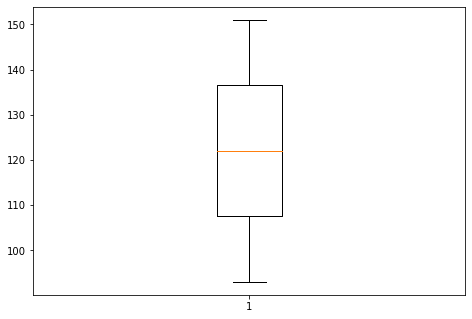

In [170]:
x_vc = len(df[df.smoker=='Yes'])
x_oj = len(df[df.smoker=='No'])
# Multiple Boxplots.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.boxplot([x_vc,x_oj],0)
#ax.set_xticklabels(['Y','N'])
plt.show()

In [195]:
df[df.smoker=='Yes'].value_counts()

total_bill  tip    sex     smoker  day   time    size
13.00       2.00   Female  Yes     Thur  Lunch   2       2
3.07        1.00   Female  Yes     Sat   Dinner  1       1
23.10       4.00   Male    Yes     Sun   Dinner  3       1
26.59       3.41   Male    Yes     Sat   Dinner  3       1
25.89       5.16   Male    Yes     Sat   Dinner  4       1
                                                        ..
15.36       1.64   Male    Yes     Sat   Dinner  2       1
15.01       2.09   Male    Yes     Sat   Dinner  2       1
14.48       2.00   Male    Yes     Sun   Dinner  2       1
14.31       4.00   Female  Yes     Sat   Dinner  2       1
50.81       10.00  Male    Yes     Sat   Dinner  3       1
Length: 92, dtype: int64

#Anova

https://www.pythonfordatascience.org/anova-python/

In [ ]:
#one way test with anova

In [192]:
res=st.f_oneway(df[df.smoker=='Yes'].value_counts(),df[df.smoker=='No'].value_counts())
print("Test statistic  : %f " % res[0] )
print("p-value         : %f " % res[1] )

Test statistic  : 1.645684 
p-value         : 0.200780 


#Pearson correlation

In Python, there is no functions to directly obtain confidence intervals (CIs) of Pearson correlations.

In [196]:
x = np.random.randint(1, 300, 10)
y  = np.random.randint(1, 300, 10)

The first step involves transformation of the correlation coefficient into a Fishers’ Z-score.

The corresponding standard deviation is:

\begin{equation}
s e=\frac{1}{\sqrt{N-3}}
\end{equation}



In [197]:
#he first step involves transformation of the correlation coefficient into a Fishers’ Z-score.
r, p = st.pearsonr(x,y)
z = np.arctanh(r)

In [198]:
#Calculating SE
std_error_z = 1/np.sqrt(x.size-3)

CI under the transformation can be calculated as   $
r_{z} \pm z_{\alpha / 2} \times s e
$
, where  $
z_{\alpha / 2}
$
 is can be calculated using scipy.stats.norm.ppf function:

In [199]:
alpha = 0.05

{'low':np.tanh(z-st.norm.ppf(0.05)*std_error_z), 'high': np.tanh(z+st.norm.ppf(0.05)*std_error_z)}


{'low': 0.6675823576369068, 'high': -0.41117415412646235}